/var/folders/fm/bjbc71f52r38jr1_2bv3hz1m0000gn/T/ipykernel_47732/1914062835.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chipo['choice_description'][num] = re.sub(pattern='[^a-zA-Z,() ]', repl='', string=i)


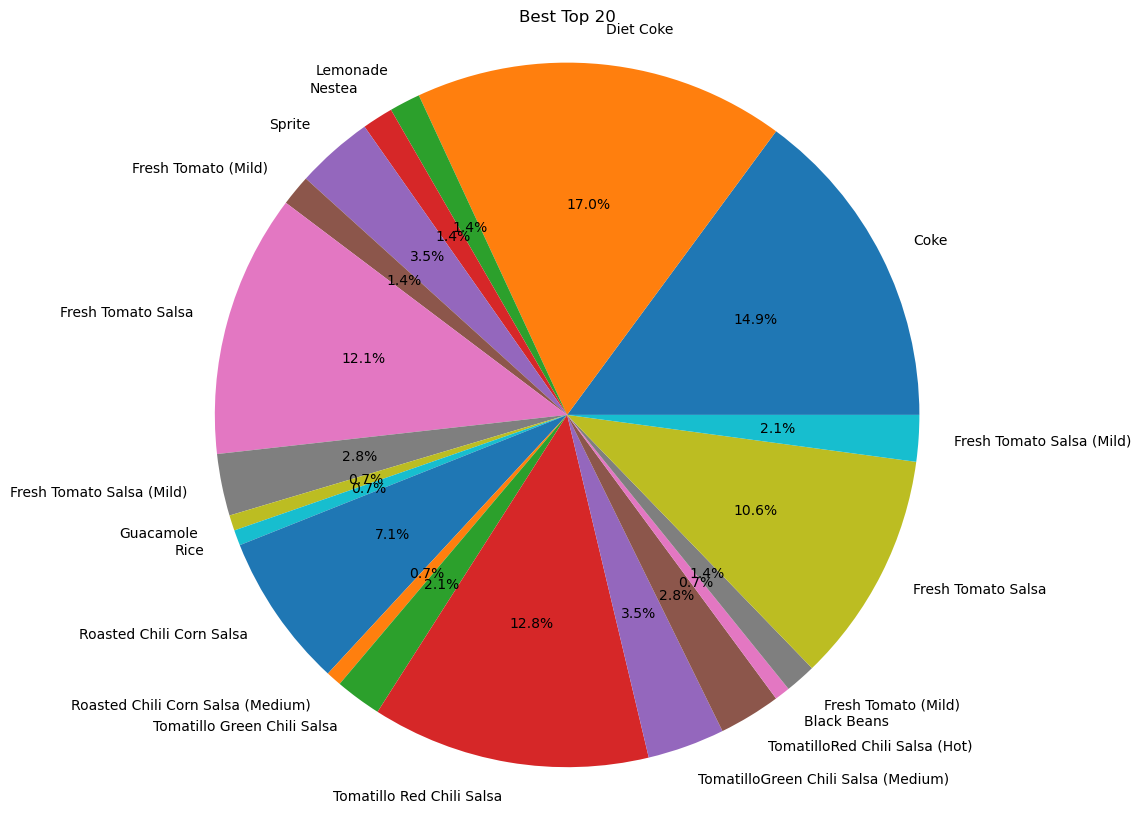

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

file_path = './Data_file/chipotle.csv'

# sep = separate, 탭으로 구분한다.
chipo = pd.read_csv(file_path)

# 집계를 위해 필요없는 열을 제거
chipo.drop(['order_id', 'item_price'], axis='columns', inplace=True)

# choice_description에 있는 NaN을 'origin'으로 바꾸기
chipo['choice_description'] = chipo['choice_description'].fillna('origin')

# 대괄호 지우기
num = 0
for i in chipo['choice_description']:
    chipo['choice_description'][num] = re.sub(pattern='[^a-zA-Z,() ]', repl='', string=i)
    num += 1

# 메뉴 이름만 뽑아내기
v_split = chipo['choice_description'].str.split(",", expand=True)
chipo['source'] = v_split[0]
v_split.pop(0)

# 집계를 위해 필요없는 열을 제거
chipo.drop(['choice_description'], axis='columns', inplace=True)

# 중복된 데이터 집계하기
result_tmp = chipo.groupby(['item_name', 'source']).size().reset_index(name='count')

# 결과를 CSV 파일로 출력
file_path = './chipotle_result.csv'
result_tmp.to_csv(file_path, sep=',')

# 차트의 크기를 조정 (가로, 세로)
plt.rcParams["figure.figsize"] = (10, 10)

# 차트 눈금선을 표기
plt.rcParams['axes.grid'] = True

temp = pd.read_csv('./chipotle_result.csv')
temp = temp.head(20)  # 데이터의 상위 10개만 선택

# 'source'와 'count'를 별도로 추출
temp_df = pd.DataFrame({'source': temp['source'], 'count': temp['count']})
labels = temp_df['source']
sizes = temp_df['count']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Best Top 20')
plt.axis('equal')
plt.show()